In [115]:
from stack import Stack
import numpy as np
import matplotlib.pyplot as plt
import warnings
import string
warnings.filterwarnings("ignore", message="divide by zero encountered in divide")

crange = [-0.5,0.5]
cmap = 'RdBu_r'

## Sensitivity to space window

In [45]:
N = 10
D_sub_range = [2,50]    # km
D_SSE_range = [10, 100] # km
D_sub = np.linspace(*D_sub_range,N)
D_SSE = np.linspace(*D_SSE_range,N)

In [46]:
space_grid = np.zeros((N,N))
for i,d_sub in enumerate(D_sub):
    for j, d_sse in enumerate(D_SSE):
        space_grid[i,j] = Stack(REPRESENTATIVE_SSE_SIZE=d_sse, DISTANCE_TO_SLAB=d_sub).average_rate_increase()

/Users/kdascher/Documents/Documents - Kelian’s MacBook Pro/Projects/Slow_slip_meta_analysis/src/data/slab2.py:138: UserWarning: xyz contains negative depths
  warnings.warn("xyz contains negative depths")
/Users/kdascher/Documents/Documents - Kelian’s MacBook Pro/Projects/Slow_slip_meta_analysis/src/data/slab2.py:138: UserWarning: xyz contains negative depths
  warnings.warn("xyz contains negative depths")
/Users/kdascher/Documents/Documents - Kelian’s MacBook Pro/Projects/Slow_slip_meta_analysis/src/data/slab2.py:138: UserWarning: xyz contains negative depths
  warnings.warn("xyz contains negative depths")
/Users/kdascher/Documents/Documents - Kelian’s MacBook Pro/Projects/Slow_slip_meta_analysis/src/data/slab2.py:138: UserWarning: xyz contains negative depths
  warnings.warn("xyz contains negative depths")
/Users/kdascher/Documents/Documents - Kelian’s MacBook Pro/Projects/Slow_slip_meta_analysis/src/data/slab2.py:138: UserWarning: xyz contains negative depths
  warnings.warn("xyz co

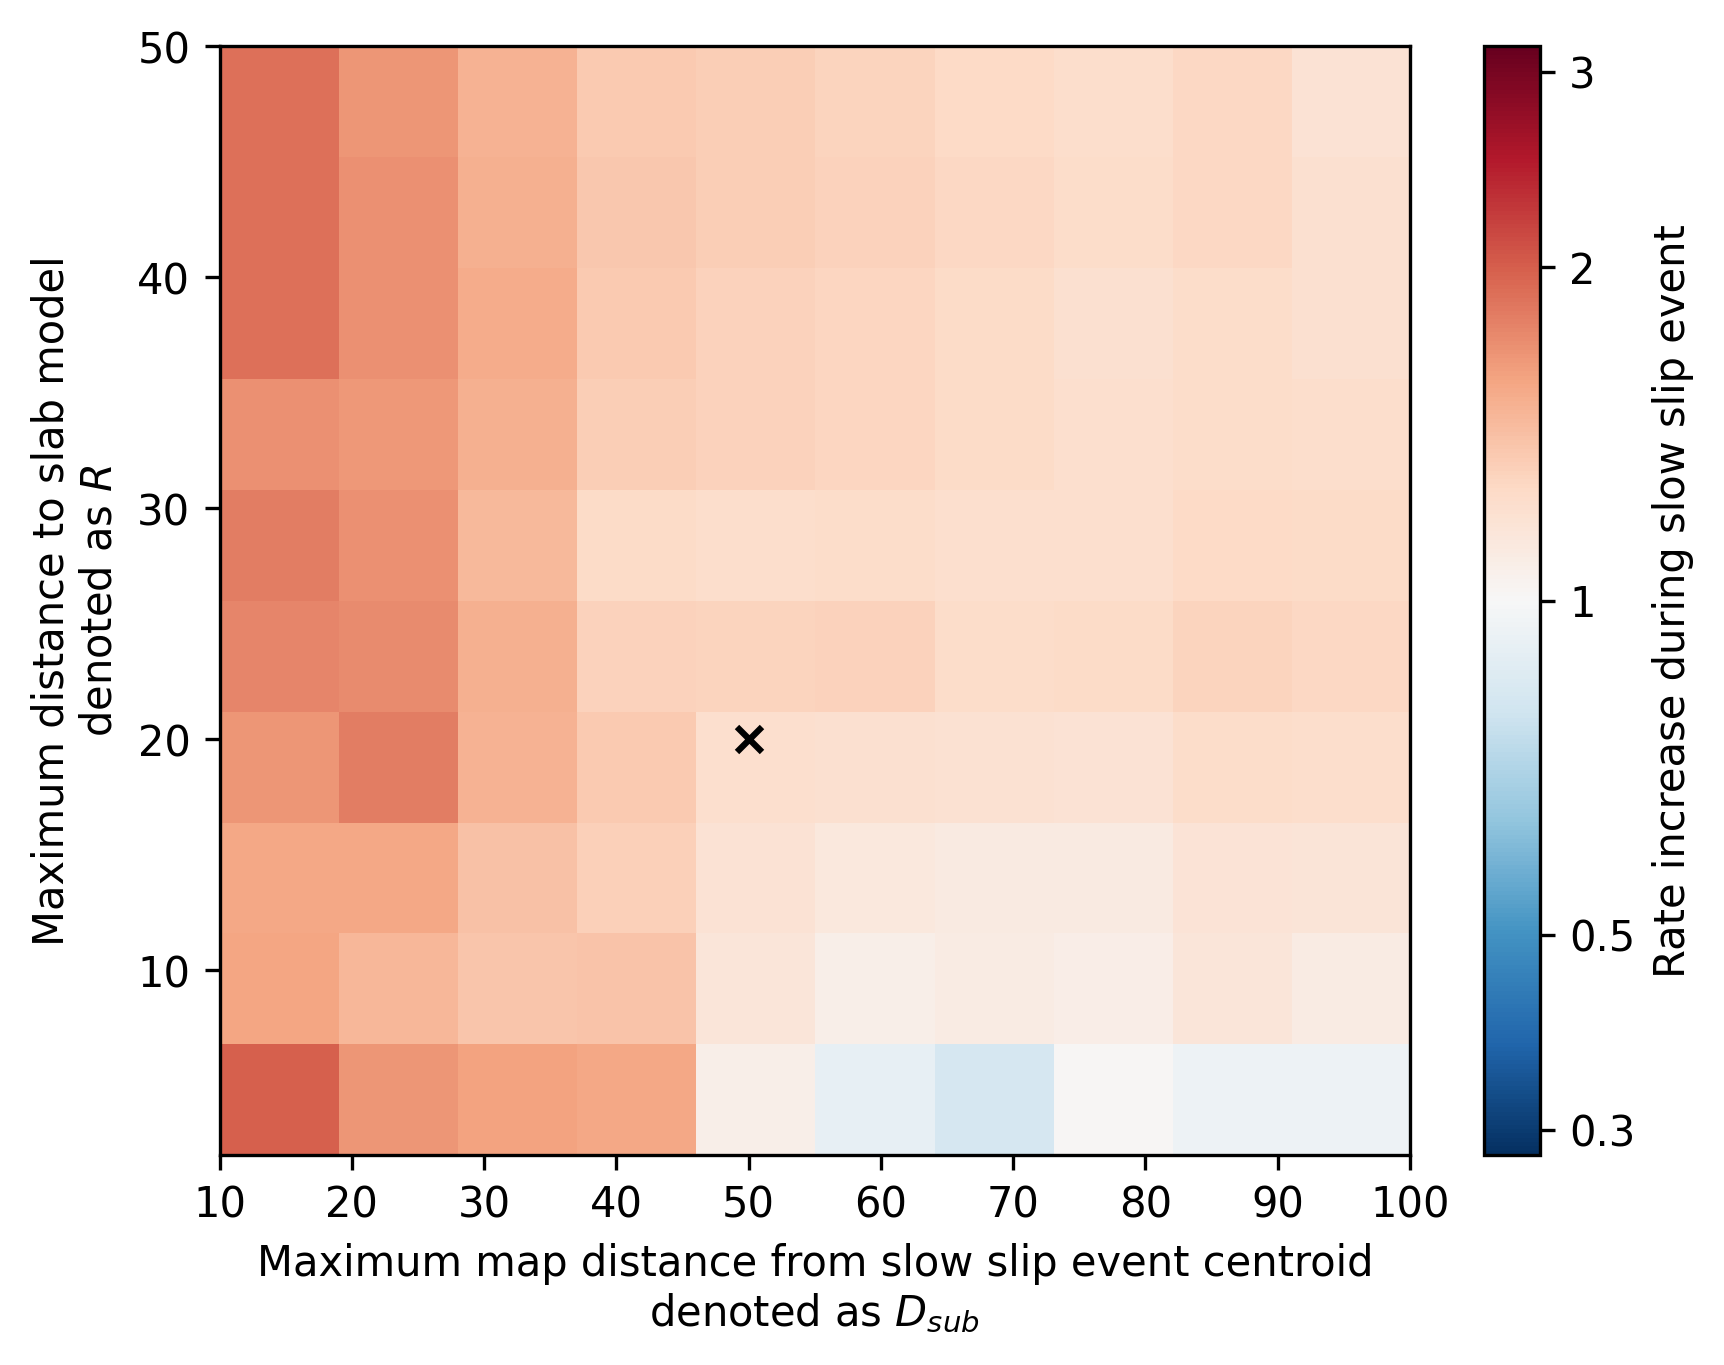

In [94]:
fig, ax = plt.subplots(dpi=300)
gr = ax.imshow(np.log10(space_grid), cmap=cmap, origin='lower',extent=[*D_SSE_range,*D_sub_range], vmin=crange[0],vmax=crange[1],aspect='auto')

ax.set(
    xlabel='Maximum map distance from slow slip event centroid\ndenoted as $D_{sub}$',
    ylabel='Maximum distance to slab model\ndenoted as $R$', 
)

cax=fig.colorbar(gr)
cax.set_label('Rate increase during slow slip event')
cax.set_ticks(np.log10([0.3333,0.5,1,2,3]))
cax.set_ticklabels([0.3,0.5,1,2,3])

ax.scatter(50, 20, marker='x', color='k')

## Sensitivity to the magnitude of completeness

In [48]:
N = 10

Mc_str = "Minimum magnitude threshold for earthquake catalog"
Mc_range = [3.5,6]    # km

Mmin_str = "Minimum magnitude threshold for slow slip event catalog"
Mmin_range = [5,7.5] # km
Mc = np.linspace(*Mc_range,N)
Mmin = np.linspace(*Mmin_range,N)

In [49]:
mag_grid = np.zeros((N,N))
for i,mc in enumerate(Mc):
    for j, mmin in enumerate(Mmin):
        mag_grid[i,j] = Stack(EARTHQUAKE_MAGNITUDE_CUTOFF=mc, SLOWSLIP_MAGNITUDE_CUTOFF=mmin).average_rate_increase()

/Users/kdascher/Documents/Documents - Kelian’s MacBook Pro/Projects/Slow_slip_meta_analysis/src/data/slab2.py:138: UserWarning: xyz contains negative depths
  warnings.warn("xyz contains negative depths")
/Users/kdascher/Documents/Documents - Kelian’s MacBook Pro/Projects/Slow_slip_meta_analysis/src/data/slab2.py:138: UserWarning: xyz contains negative depths
  warnings.warn("xyz contains negative depths")
/Users/kdascher/Documents/Documents - Kelian’s MacBook Pro/Projects/Slow_slip_meta_analysis/src/data/slab2.py:138: UserWarning: xyz contains negative depths
  warnings.warn("xyz contains negative depths")
/Users/kdascher/Documents/Documents - Kelian’s MacBook Pro/Projects/Slow_slip_meta_analysis/src/data/slab2.py:138: UserWarning: xyz contains negative depths
  warnings.warn("xyz contains negative depths")
/Users/kdascher/Documents/Documents - Kelian’s MacBook Pro/Projects/Slow_slip_meta_analysis/src/data/slab2.py:138: UserWarning: xyz contains negative depths
  warnings.warn("xyz co

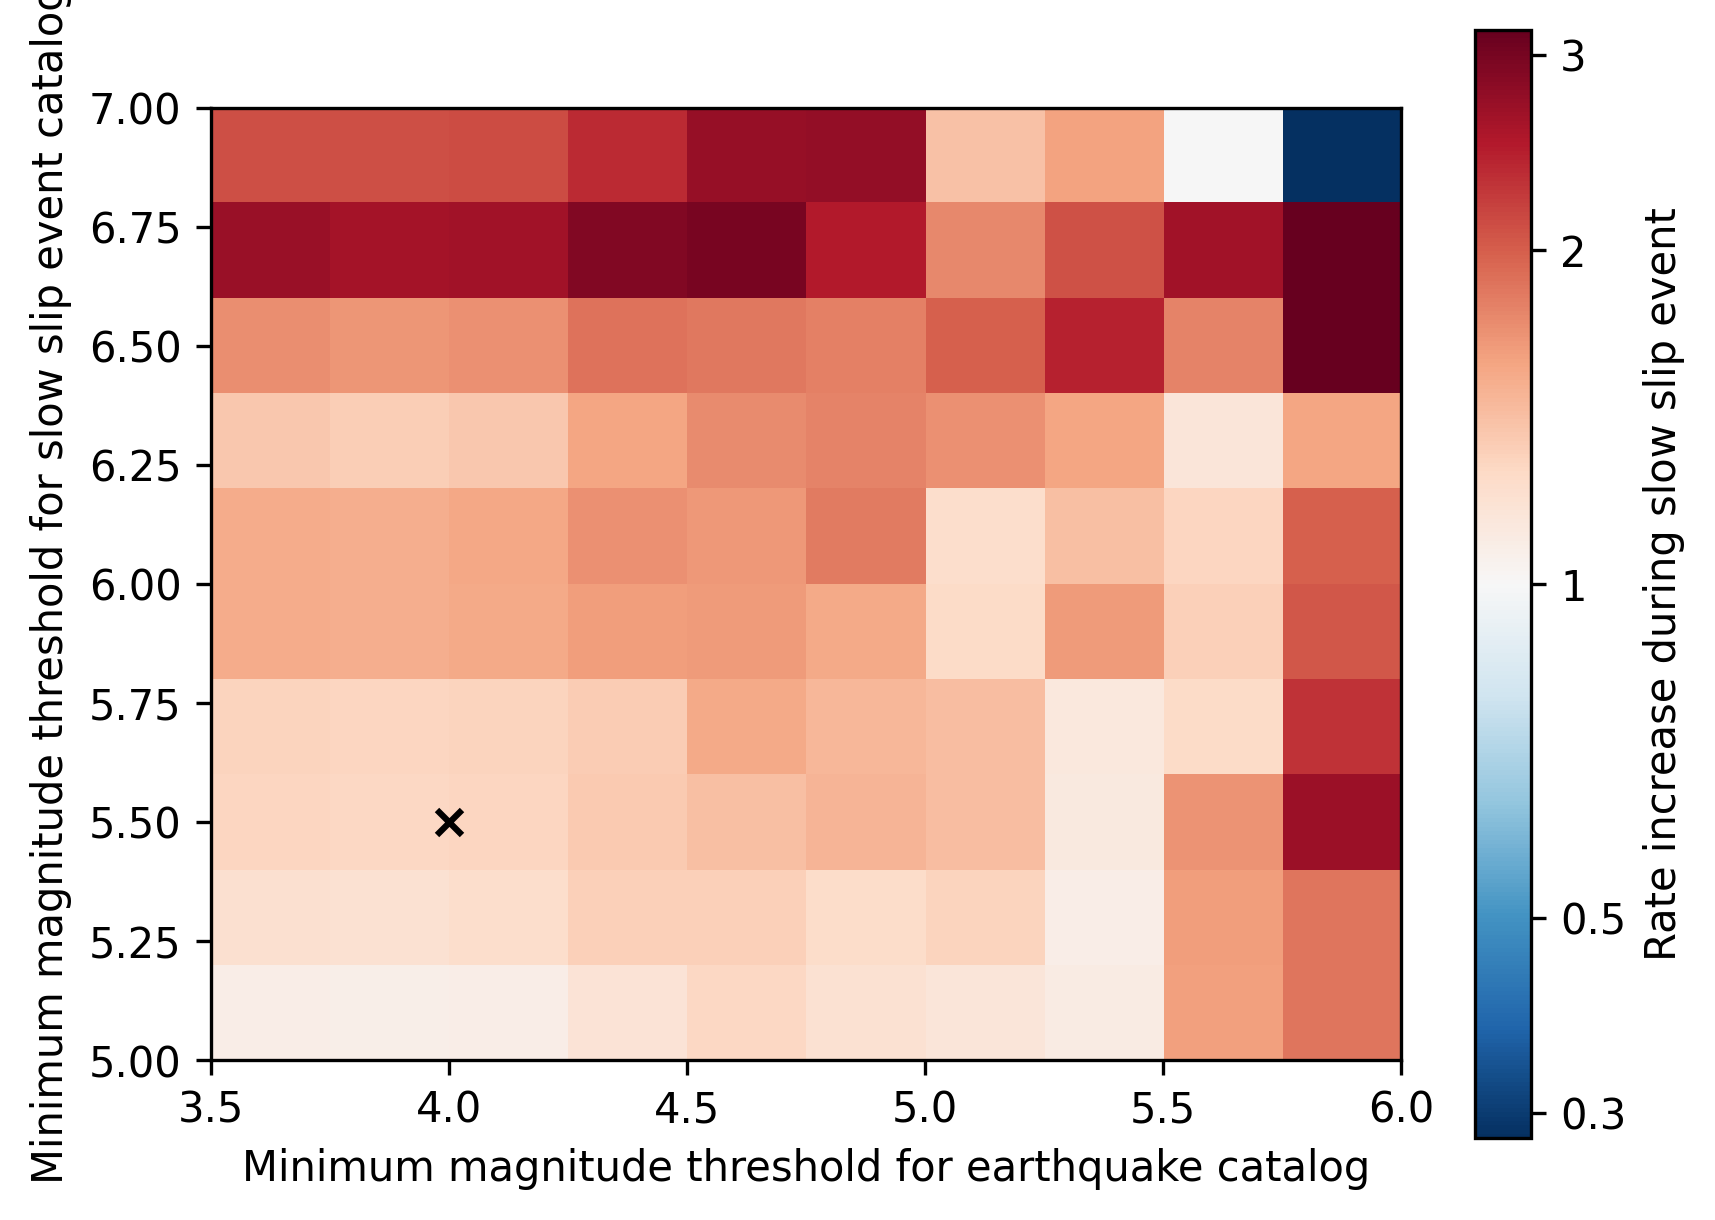

In [92]:
fig, ax = plt.subplots(dpi=300)

gr = ax.imshow(np.log10(mag_grid), cmap=cmap, origin='lower',extent=[*Mc_range,*Mmin_range],vmin=crange[0],vmax=crange[1])

ax.set(
    xlabel=Mc_str,
    ylabel=Mmin_str,
)

cax = fig.colorbar(gr)
cax.set_label('Rate increase during slow slip event')
cax.set_ticks(np.log10([0.3333,0.5,1,2,3]))
cax.set_ticklabels([0.3,0.5,1,2,3])

ax.scatter(4, 5.5, marker='x', color='k')

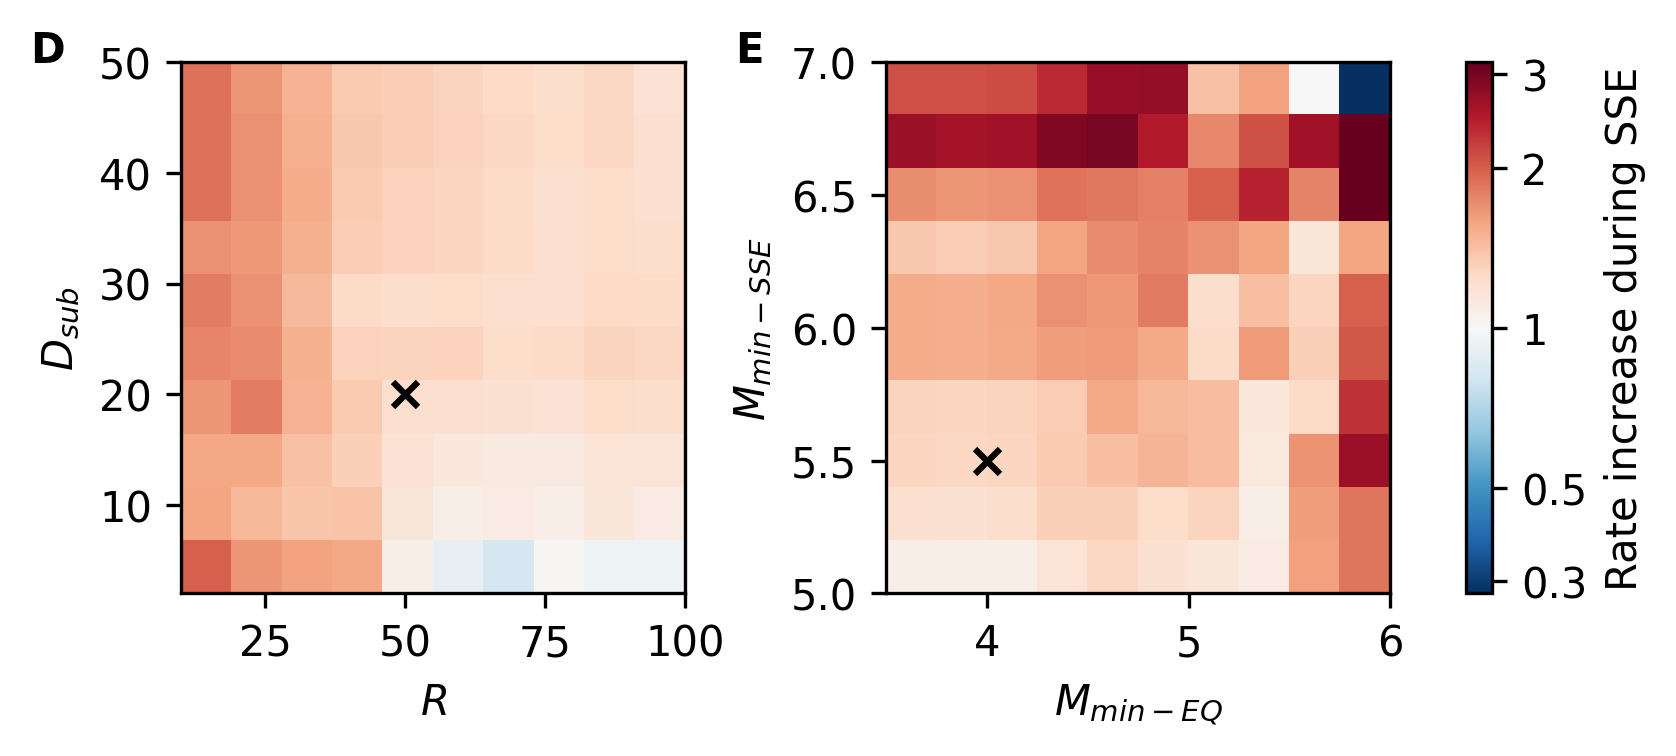

In [118]:
fig, AX = plt.subplots(1,2, dpi=300, figsize=(6.5,2.3), gridspec_kw=dict(wspace=0.4))


# spatial sensitivity plot (panel D)
ax = AX[0]
gr = ax.imshow(np.log10(space_grid), cmap=cmap, origin='lower',extent=[*D_SSE_range,*D_sub_range], vmin=crange[0],vmax=crange[1],aspect='auto')

ax.set(
    xlabel='$R$',
    ylabel='$D_{sub}$',
)


ax.scatter(50, 20, marker='x', color='k')

# Magnitude sensitivity plot (panel E)
ax = AX[1]
gr = ax.imshow(np.log10(mag_grid), cmap=cmap, origin='lower',extent=[*Mc_range,*Mmin_range],vmin=crange[0],vmax=crange[1],aspect='auto')

ax.set(
    xlabel=r'$M_{min-EQ}$',
    ylabel=r'$M_{min-SSE}$',
)

cax = fig.colorbar(gr, ax=AX.ravel().tolist())
cax.set_label('Rate increase during SSE')
cax.set_ticks(np.log10([0.3333,0.5,1,2,3]))
cax.set_ticklabels([0.3,0.5,1,2,3])

ax.scatter(4, 5.5, marker='x', color='k')

for n, ax in enumerate(AX):
    pos = [-0.3, 1]
    ax.text(*pos, string.ascii_uppercase[n+3], transform=ax.transAxes, weight='bold')

### Sensitivity of the lag to the cutoff

In [51]:
inc = 0.1
Mmin_str = "Minimum magnitude threshold for slow slip event catalog"
Mmin_range = [5.0,7] # km
Mmin = np.arange(*Mmin_range,inc)-inc/2
time_window = 6

In [52]:
inc = 0.1
time_series = [
    Stack(EARTHQUAKE_MAGNITUDE_CUTOFF=4,SLOWSLIP_MAGNITUDE_CUTOFF=mag_cutoff, TIME_WINDOW=time_window, SMOOTHING_BW_SOURCE_DURATION=0.2).kde_timeseries()[1] 
    for mag_cutoff in Mmin
]

/Users/kdascher/Documents/Documents - Kelian’s MacBook Pro/Projects/Slow_slip_meta_analysis/src/data/slab2.py:138: UserWarning: xyz contains negative depths
  warnings.warn("xyz contains negative depths")
/Users/kdascher/Documents/Documents - Kelian’s MacBook Pro/Projects/Slow_slip_meta_analysis/src/data/slab2.py:138: UserWarning: xyz contains negative depths
  warnings.warn("xyz contains negative depths")
/Users/kdascher/Documents/Documents - Kelian’s MacBook Pro/Projects/Slow_slip_meta_analysis/src/data/slab2.py:138: UserWarning: xyz contains negative depths
  warnings.warn("xyz contains negative depths")
/Users/kdascher/Documents/Documents - Kelian’s MacBook Pro/Projects/Slow_slip_meta_analysis/src/data/slab2.py:138: UserWarning: xyz contains negative depths
  warnings.warn("xyz contains negative depths")
/Users/kdascher/Documents/Documents - Kelian’s MacBook Pro/Projects/Slow_slip_meta_analysis/src/data/slab2.py:138: UserWarning: xyz contains negative depths
  warnings.warn("xyz co

[Text(0.5, 0, 'Minimum magnitude threshold for slow slip event catalog'),
 Text(0, 0.5, 'Time relative to slow slip\n(in number of source durations)')]

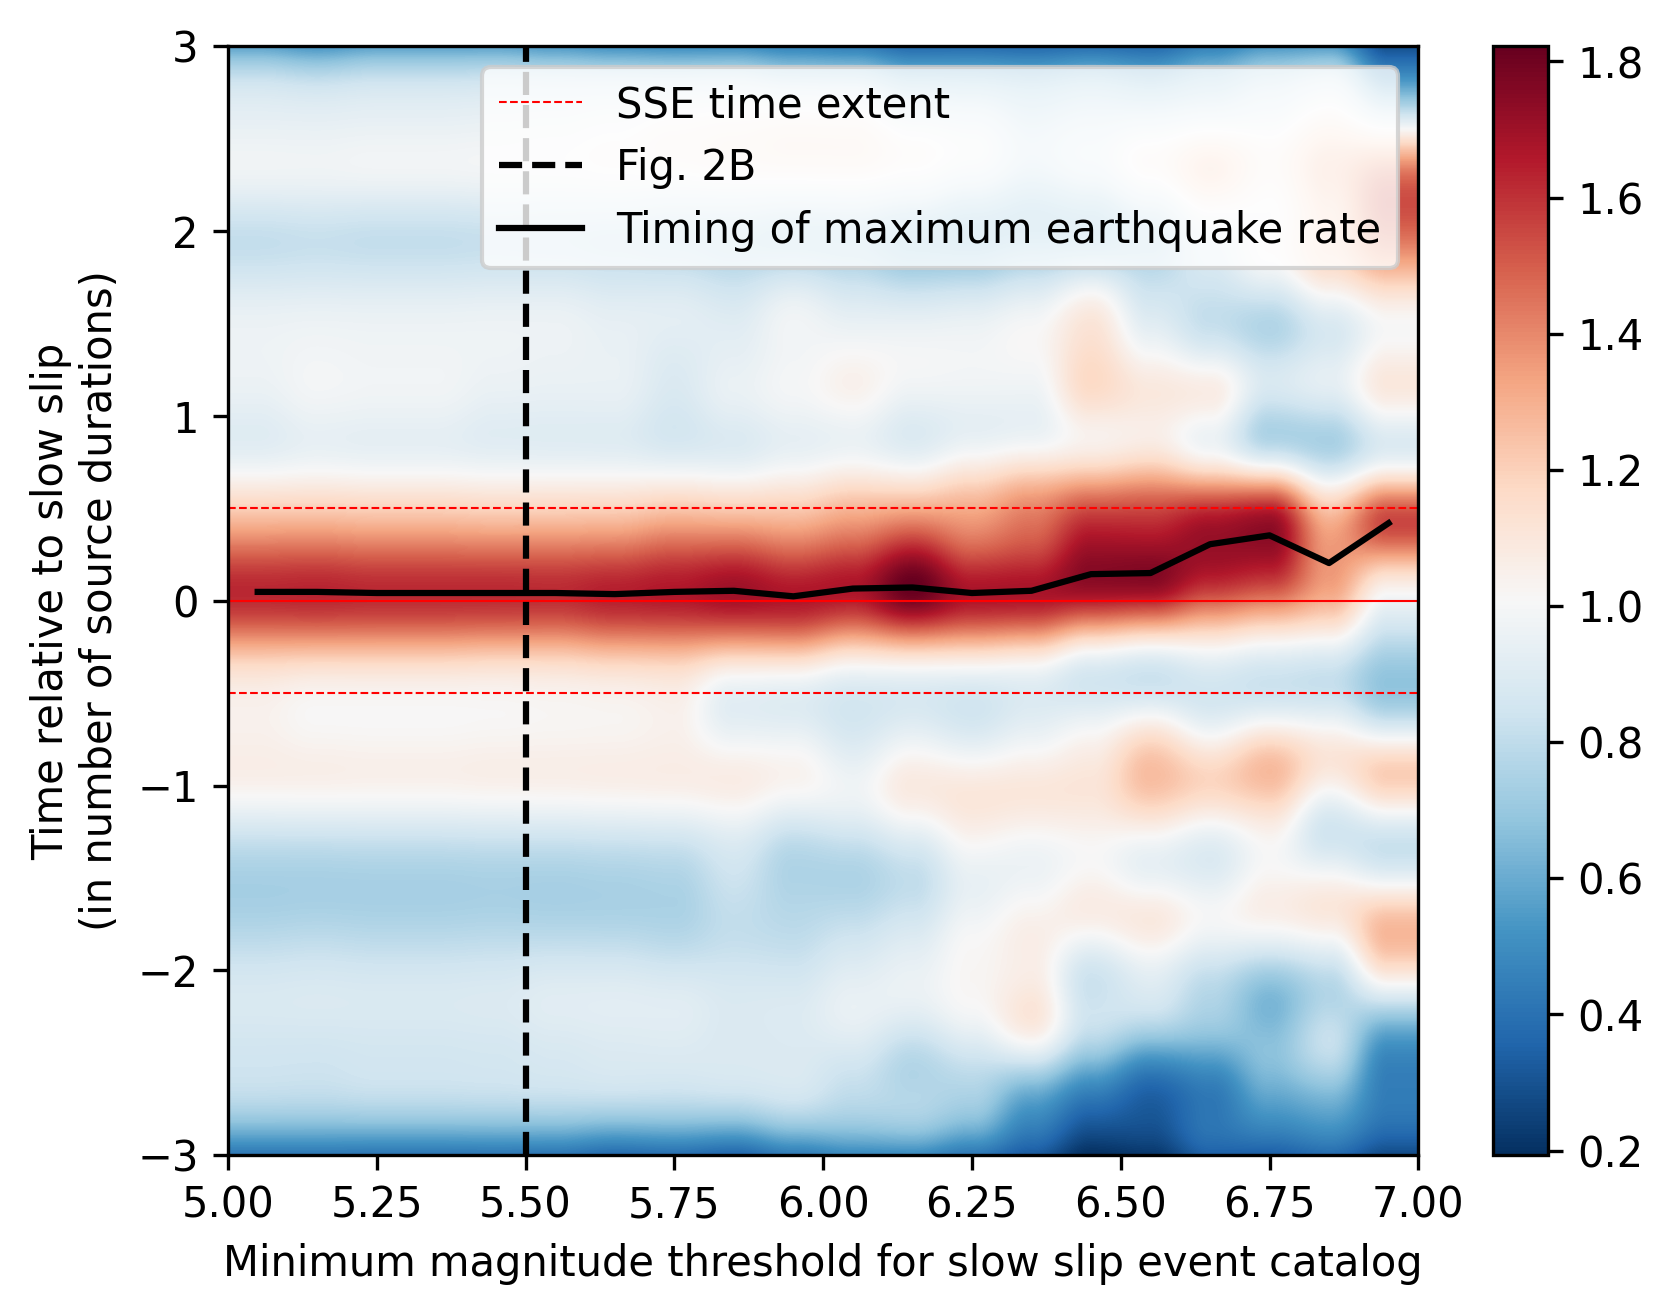

In [53]:
fig, ax = plt.subplots(dpi=300)
gr = ax.imshow(
    np.row_stack(time_series).T*time_window,aspect="auto", 
    extent=[*Mmin_range, -time_window/2, time_window/2], 
    origin='lower',
    cmap=cmap,
)

cbar = plt.colorbar(gr)

ax.axhline(-0.5,c='r',ls='--',lw=0.5)
ax.axhline(0.5,c='r',ls='--',lw=0.5, label='SSE time extent')
ax.axhline(0,c='r',lw=0.5)
ax.axvline(5.5,c='k', ls='--', label='Fig. 2B')

ax.plot(Mmin+inc, [np.argmax(ts)*time_window/1000 - time_window/2 for ts in time_series],c='k',label='Timing of maximum earthquake rate')

ax.legend()
ax.set(
    xlabel=Mmin_str,
    ylabel='Time relative to slow slip\n(in number of source durations)',
)

### Influence of slow slip on eathquake magnitude

In [54]:
log_time_range = [-1,1.5]
time_array = np.logspace(*log_time_range,10)
mag_completeness =4.5

5200

In [64]:
def calc_b(M, Mc = mag_completeness, inc=0.1):
    return 1.0/(np.log(10) * (np.mean(M)-Mc+inc/2)) 

def calc_b_std(M,Mc = mag_completeness, inc=0.1):
    """shi and bolt, 1982"""
    N = len(M)
    sigma_2_M = np.sum((M-np.mean(M))**2)/(N*(N-1))
    return 2.30 * calc_b(M,Mc, inc=0.1)**2 * np.sqrt(sigma_2_M)   
    

b_array = []
std_array = []
b_array_post = []
std_array_post = []
b_array_pre = []
std_array_pre = []

for i_time_window in time_array:
    stack = Stack(TIME_WINDOW=i_time_window,EARTHQUAKE_MAGNITUDE_CUTOFF=4.5)
    
    # all the data
    b_array.append(
        calc_b(stack.local_earthquakes.catalog.mag.values[stack.indices])
    )
    std_array.append(
        calc_b_std(stack.local_earthquakes.catalog.mag.values[stack.indices])
    )
    
    # after slow slip 
    b_array_post.append(
        calc_b(stack.local_earthquakes.catalog.mag.values[stack.indices[stack.times>0]])
    )
    std_array_post.append(
        calc_b_std(stack.local_earthquakes.catalog.mag.values[stack.indices[stack.times>0]])
    )

    # before slow slip
    b_array_pre.append(
        calc_b(stack.local_earthquakes.catalog.mag.values[stack.indices[stack.times<0]])
    )
    std_array_pre.append(
        calc_b_std(stack.local_earthquakes.catalog.mag.values[stack.indices[stack.times<0]])
    )

/Users/kdascher/Documents/Documents - Kelian’s MacBook Pro/Projects/Slow_slip_meta_analysis/src/data/slab2.py:138: UserWarning: xyz contains negative depths
  warnings.warn("xyz contains negative depths")
/Users/kdascher/Documents/Documents - Kelian’s MacBook Pro/Projects/Slow_slip_meta_analysis/src/data/slab2.py:138: UserWarning: xyz contains negative depths
  warnings.warn("xyz contains negative depths")
/Users/kdascher/Documents/Documents - Kelian’s MacBook Pro/Projects/Slow_slip_meta_analysis/src/data/slab2.py:138: UserWarning: xyz contains negative depths
  warnings.warn("xyz contains negative depths")
/Users/kdascher/Documents/Documents - Kelian’s MacBook Pro/Projects/Slow_slip_meta_analysis/src/data/slab2.py:138: UserWarning: xyz contains negative depths
  warnings.warn("xyz contains negative depths")
/Users/kdascher/Documents/Documents - Kelian’s MacBook Pro/Projects/Slow_slip_meta_analysis/src/data/slab2.py:138: UserWarning: xyz contains negative depths
  warnings.warn("xyz co

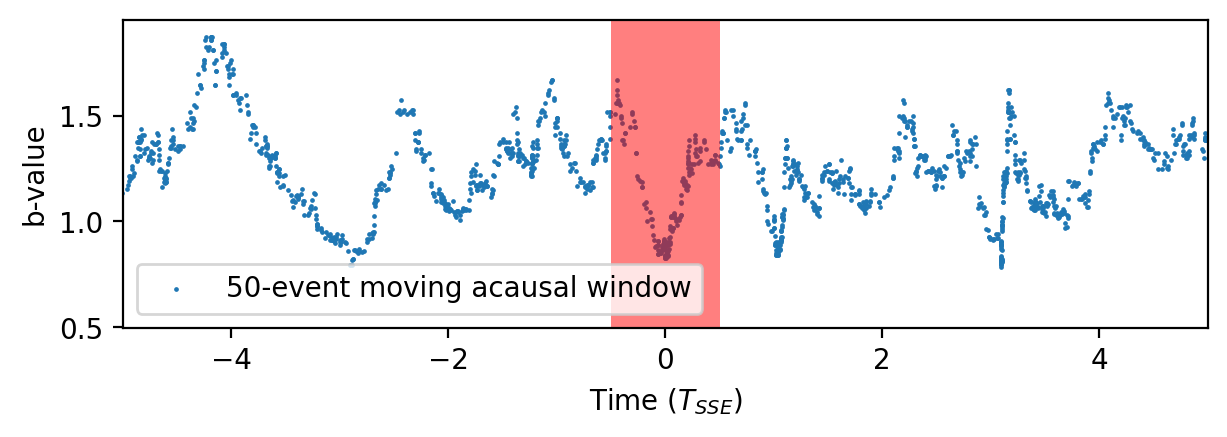

In [86]:
sorted_I = np.argsort(stack.times)
sorted_times = stack.times[sorted_I]
sorted_indices = stack.indices[sorted_I]
sorted_mags = stack.local_earthquakes.catalog.mag.values[sorted_indices]

number_of_earthquakes_for_bval = 50
b_time_series = np.nan*np.zeros_like(sorted_times)
for i in range(int(number_of_earthquakes_for_bval/2),len(sorted_times)-int(number_of_earthquakes_for_bval/2)):
    b_time_series[i] = calc_b(sorted_mags[i-int(number_of_earthquakes_for_bval/2):i+int(number_of_earthquakes_for_bval/2)])

fig, ax = plt.subplots(figsize=(7,2),dpi=200)
ax.scatter(sorted_times, b_time_series,s=0.5, label=f"{number_of_earthquakes_for_bval}-event moving acausal window")
ax.axvspan(-0.5,0.5,facecolor='r',alpha=0.5)
ax.set(
    ylabel='b-value',
    xlabel=r'Time ($T_{SSE}$)',
    xlim=[-5,5]
)
ax.legend(loc='lower left')

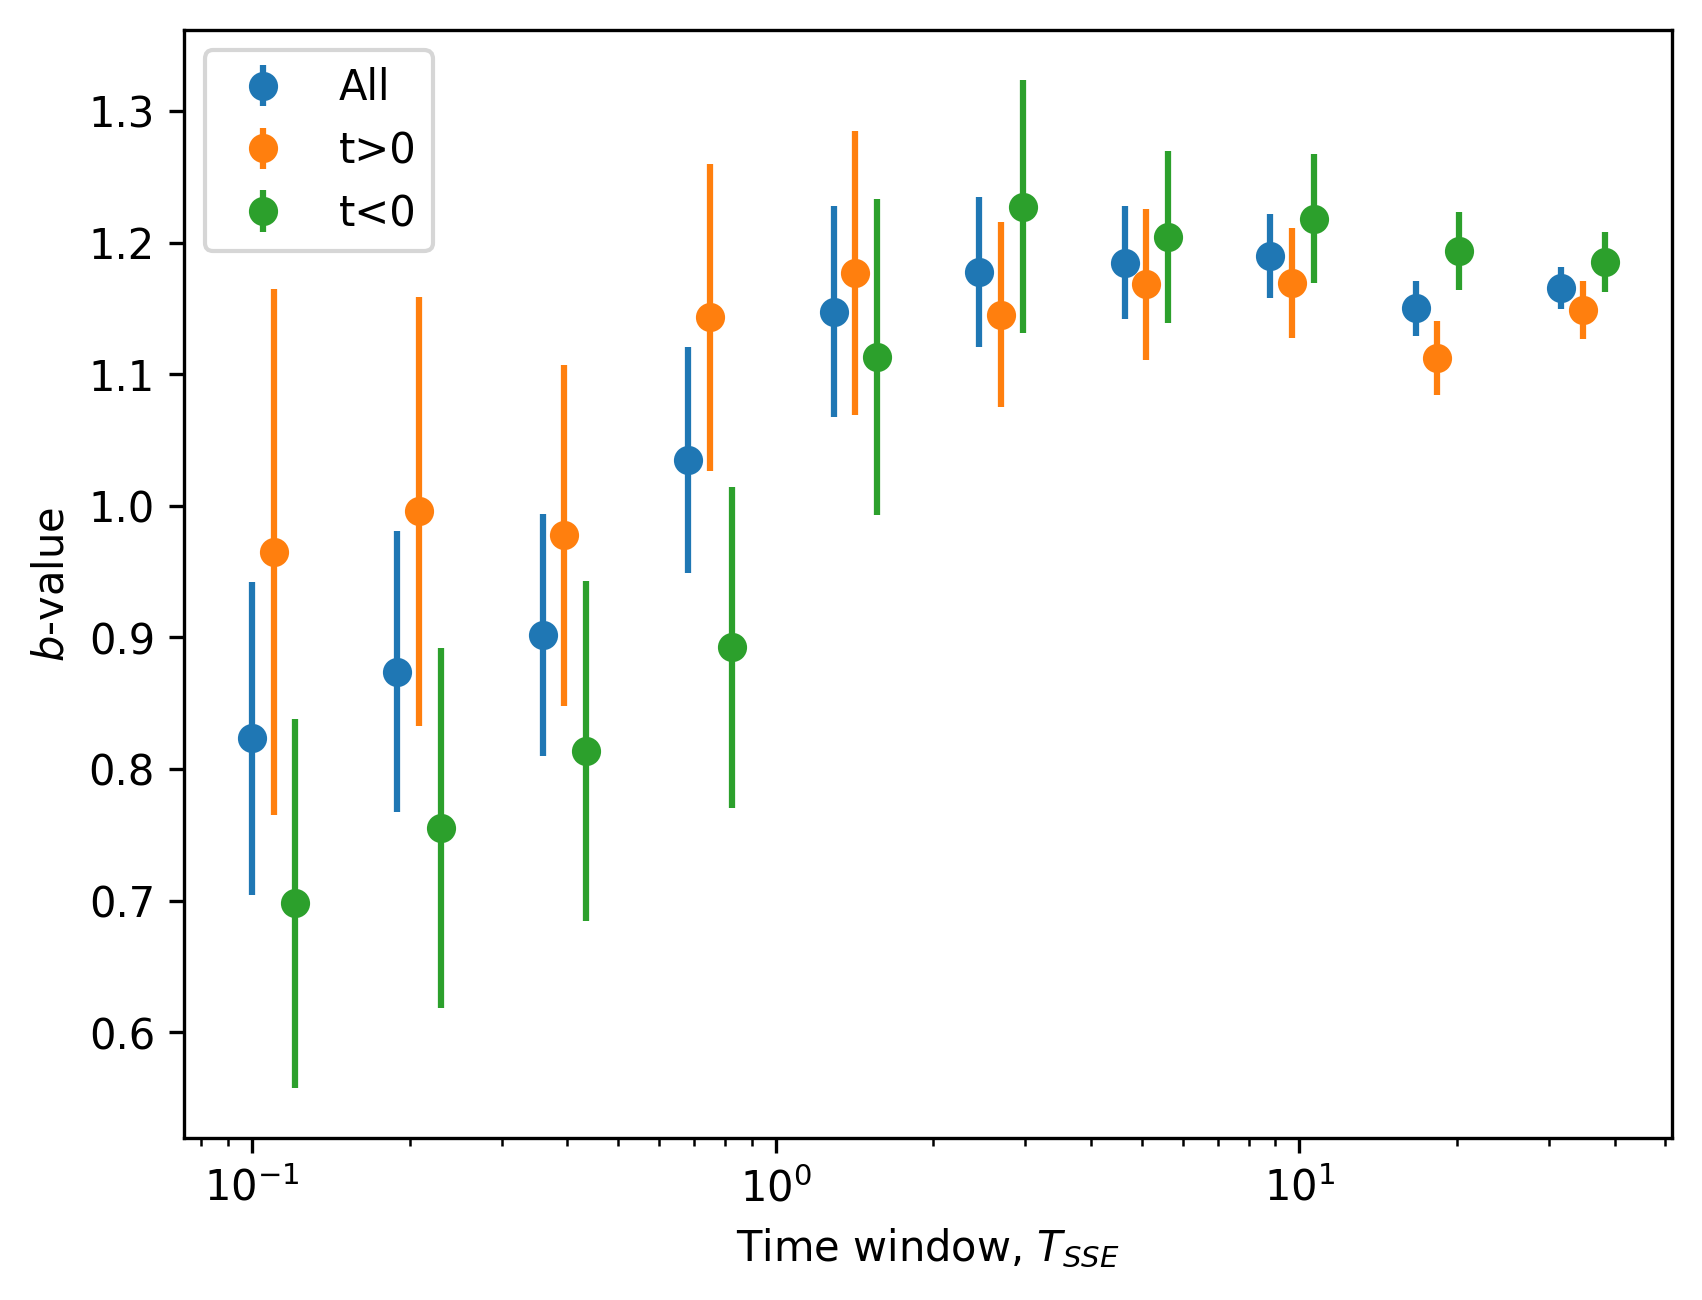

In [68]:
fig, ax = plt.subplots(dpi=300)

inc = 1
for b, std, label in zip(
    [b_array, b_array_post, b_array_pre],
    [std_array,std_array_post,std_array_pre],
    ['All','t>0','t<0'], 
):
    
    ax.errorbar(
        time_array*inc,
        b,
        yerr = std,
        linestyle='none',
        marker='o',
        label=label,
    )
    
    inc*=1.1

ax.set(
    xlabel=r'Time window, $T_{SSE}$',
    ylabel=r'$b$-value',
    xscale='log'
)

ax.legend()

In [57]:
from src.catalogs import JapanSlowSlipCatalog 
time_window = 8
shallow_stack = Stack(JapanSlowSlipCatalog().get_nankai_trough().get_clusters('depth',2)[0], TIME_WINDOW=time_window)
deep_stack = Stack(JapanSlowSlipCatalog().get_nankai_trough().get_clusters('depth',2)[1], TIME_WINDOW=time_window)

[Text(0.5, 0, 'Normalized time since slow slip centroid'),
 Text(0, 0.5, 'Relative earthquake rate')]

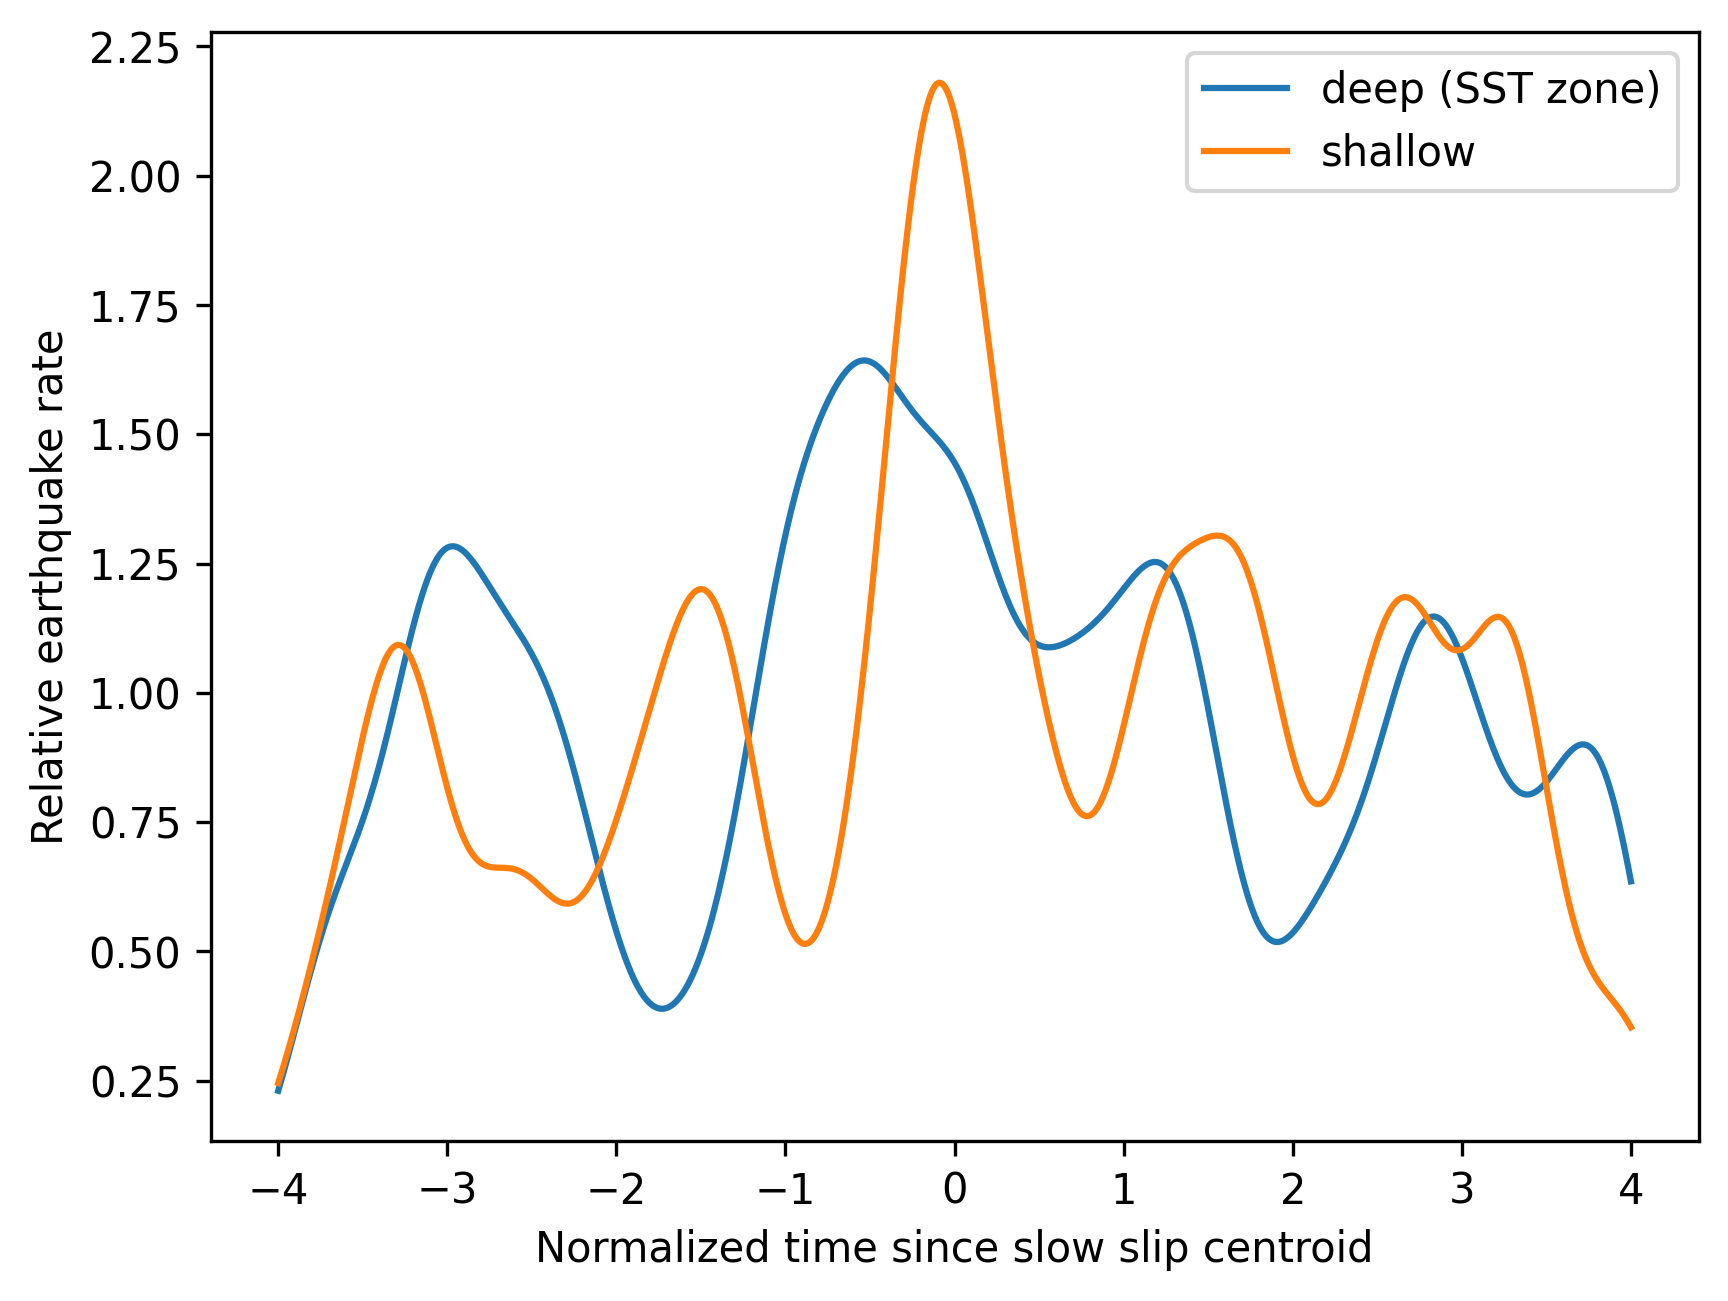

In [58]:
fig, ax = plt.subplots(dpi=300)
ax.plot(deep_stack.kde_timeseries()[0],deep_stack.kde_timeseries()[1]*time_window, label='deep (SST zone)')
ax.plot(shallow_stack.kde_timeseries()[0],shallow_stack.kde_timeseries()[1]*time_window, label='shallow')
ax.legend()
ax.set(
    xlabel='Normalized time since slow slip centroid',
    ylabel='Relative earthquake rate',
)